# Importing Data From FPL

Retrieve current season data from fantasy premier league site


In [4]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

# Make a request to GET the data from the FPL API
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)

# Convert JSON data to a python object
data = json.loads(response.text)

# Create pandas DataFrame from JSON player data
df = pd.DataFrame.from_dict(data['elements'])

# Resorting Data

Format columns, drop unnecessary columns



In [5]:
# Format Column Names
df.columns = df.columns.str.replace('_',' ')
df.columns = df.columns.str.title()

# Rename Selected Columns
df = df.rename(columns={'Second Name':'Last Name'})

# Combine First and Last Names
df['Player Name'] = df['First Name'] + " " + df['Last Name']

# Drop unneeded columns
df = df.drop(['Dreamteam Count','News','News Added','Photo','Squad Number','Special','Web Name','In Dreamteam','Corners And Indirect Freekicks Text','Direct Freekicks Text','Penalties Text','Code','Status'],axis=1)

# Get Column Name List 

Only needed when writing code

In [6]:
# Retrieve Column List - only needed in code production
# cols = list(df.columns.values)
# cols

# Sort Columns

Change column order, convert data type of numeric columns

In [7]:
# Change Column Order
cols = ['Player Name','Points Per Game','Now Cost','Chance Of Playing Next Round','Chance Of Playing This Round','Cost Change Event','Cost Change Event Fall','Cost Change Start','Cost Change Start Fall','Element Type','Ep Next','Ep This','Event Points','Form','Id','Selected By Percent','Team','Team Code','Total Points','Transfers In','Transfers In Event','Transfers Out','Transfers Out Event','Value Form','Value Season','Minutes','Goals Scored','Assists',
'Clean Sheets','Goals Conceded','Own Goals','Penalties Saved','Penalties Missed','Yellow Cards','Red Cards','Saves','Bonus','Bps','Influence','Creativity','Threat','Ict Index','Influence Rank','Influence Rank Type','Creativity Rank','Creativity Rank Type','Threat Rank','Threat Rank Type','Ict Index Rank','Ict Index Rank Type','Corners And Indirect Freekicks Order','Direct Freekicks Order','Penalties Order']
df = df[cols]

# Set Index Column
df = df.set_index('Player Name')

# Remove 'Player Name' From Cols to Prepare for Convert
cols = ['Points Per Game','Now Cost','Chance Of Playing Next Round','Chance Of Playing This Round','Cost Change Event','Cost Change Event Fall','Cost Change Start','Cost Change Start Fall','Element Type','Ep Next','Ep This','Event Points','Form','Id','Selected By Percent','Team','Team Code','Total Points','Transfers In','Transfers In Event','Transfers Out','Transfers Out Event','Value Form','Value Season','Minutes','Goals Scored','Assists',
'Clean Sheets','Goals Conceded','Own Goals','Penalties Saved','Penalties Missed','Yellow Cards','Red Cards','Saves','Bonus','Bps','Influence','Creativity','Threat','Ict Index','Influence Rank','Influence Rank Type','Creativity Rank','Creativity Rank Type','Threat Rank','Threat Rank Type','Ict Index Rank','Ict Index Rank Type','Corners And Indirect Freekicks Order','Direct Freekicks Order','Penalties Order']

# Convert Columns to Float
for col in cols:  # Iterate over chosen columns
	df[col] = pd.to_numeric(df[col])

# Calculate Player Value

Creates a calculated column

Add other metrics that may be helpful

In [8]:
# Show All (Not Just 5 or 10 rows)
#pd.set_option("display.max_rows",None,"display.max_columns",None)

# Sort by Points
#df.sort_values('Points Per Game', ascending = False).head()

# Change String to Float
#df['Points Per Game'] = pd.to_numeric(df['Points Per Game'], downcast="float")
#df['Now Cost'] = 0.1*(pd.to_numeric(df['Now Cost'], downcast="float"))


# Created Calculated Value Column
df['Value'] = round(df['Points Per Game']/df['Now Cost'],2)


# Reorder columns and Print

Do I really need this twice? Delete the first

In [9]:
# Change Column Order
df = df[['Points Per Game','Now Cost','Value','Chance Of Playing Next Round','Chance Of Playing This Round','Cost Change Event','Cost Change Event Fall','Cost Change Start','Cost Change Start Fall','Element Type','Ep Next','Ep This','Event Points','Form','Id','Selected By Percent','Team','Team Code','Total Points','Transfers In','Transfers In Event','Transfers Out','Transfers Out Event','Value Form','Value Season','Minutes','Goals Scored','Assists',
'Clean Sheets','Goals Conceded','Own Goals','Penalties Saved','Penalties Missed','Yellow Cards','Red Cards','Saves','Bonus','Bps','Influence','Creativity','Threat','Ict Index','Influence Rank','Influence Rank Type','Creativity Rank','Creativity Rank Type','Threat Rank','Threat Rank Type','Ict Index Rank','Ict Index Rank Type','Corners And Indirect Freekicks Order','Direct Freekicks Order','Penalties Order']]

# Sort and Print
df.sort_values('Points Per Game', ascending = False).head()

,Points Per Game,Now Cost,Value,Chance Of Playing Next Round,Chance Of Playing This Round,Cost Change Event,Cost Change Event Fall,Cost Change Start,Cost Change Start Fall,Element Type,...,Influence Rank Type,Creativity Rank,Creativity Rank Type,Threat Rank,Threat Rank Type,Ict Index Rank,Ict Index Rank Type,Corners And Indirect Freekicks Order,Direct Freekicks Order,Penalties Order
Player Name,,,,,,,,,,,,,,,,,,,,,
Benjamin Chilwell,18.0,56,0.32,100.0,100.0,1,-1,1,-1,2,...,36,62,13,142,33,94,23,3.0,NaN,NaN
Serge Aurier,12.0,52,0.23,100.0,100.0,0,0,-3,3,2,...,29,197,53,64,7,101,26,NaN,NaN,NaN
Jack Grealish,11.7,71,0.16,NaN,NaN,1,-1,1,-1,3,...,3,12,8,10,5,5,3,3.0,7.0,3.0
Heung-Min Son,11.2,91,0.12,100.0,25.0,1,-1,1,-1,3,...,1,3,3,8,4,3,2,1.0,4.0,2.0
Harry Kane,11.0,106,0.10,NaN,NaN,1,-1,1,-1,4,...,1,13,1,3,2,2,1,NaN,1.0,1.0


# Value Scatterplot

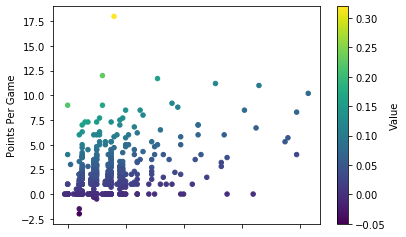

In [10]:
# Scatterplot
df.plot(x='Now Cost', y='Points Per Game',kind='scatter',c='Value',colormap='viridis')

# Remove Low-Minute Players

Removes players with less than 2 full games

In [11]:
# Remove players with fewer than 2 full games played (180 minutes)
df = df[df['Minutes']>180]

# Drop More unneeded columns
df = df.drop(['Chance Of Playing Next Round','Chance Of Playing This Round','Cost Change Event','Cost Change Event Fall','Cost Change Start','Cost Change Start Fall','Element Type','Ep Next','Ep This','Id','Transfers In','Transfers In Event','Transfers Out','Transfers Out Event','Influence Rank','Influence Rank Type','Creativity Rank','Creativity Rank Type','Threat Rank','Threat Rank Type','Ict Index Rank','Ict Index Rank Type'],axis=1)

# Rename More Selected Columns
df = df.rename(columns={'Event Points':'Current Gameweek Points','Selected By Percent':'Ownership'})

# Sort and Print
df.sort_values('Points Per Game', ascending = False).head() # Remove .head() to see full list


,Points Per Game,Now Cost,Value,Current Gameweek Points,Form,Ownership,Team,Team Code,Total Points,Value Form,...,Saves,Bonus,Bps,Influence,Creativity,Threat,Ict Index,Corners And Indirect Freekicks Order,Direct Freekicks Order,Penalties Order
Player Name,,,,,,,,,,,,,,,,,,,,,
Jack Grealish,11.7,71,0.16,24,11.7,18.1,2,7,35,1.6,...,0,3,129,183.8,120.3,170.0,47.4,3.0,7.0,3.0
Heung-Min Son,11.2,91,0.12,18,14.3,37.4,17,6,45,1.6,...,0,5,162,249.0,171.3,181.0,60.2,1.0,4.0,2.0
Harry Kane,11.0,106,0.10,16,14.0,26.3,17,6,44,1.3,...,0,6,159,235.0,119.0,269.0,62.3,NaN,1.0,1.0
Mohamed Salah,10.2,123,0.08,13,7.0,45.2,11,14,41,0.6,...,0,4,155,217.8,180.7,300.0,69.8,6.0,2.0,2.0
Dominic Calvert-Lewin,9.2,76,0.12,6,9.7,49.8,7,11,37,1.3,...,0,5,157,216.0,22.6,272.0,51.0,NaN,NaN,NaN


# Value Scatterplot 2

No low-minute players

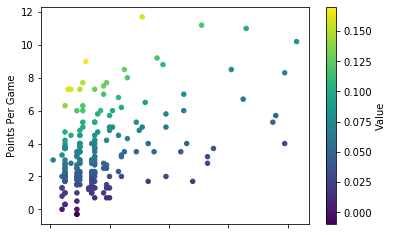

In [12]:
# Scatterplot 
df.plot(x='Now Cost', y='Points Per Game',kind='scatter',c='Value',colormap='viridis')

# Value Scatterplot 3 

I don't think this is helpful. But it may be if I reshape and create a line over which players are under-valued. You need to start thinking strategically about what the best team selection would be in relation to value.

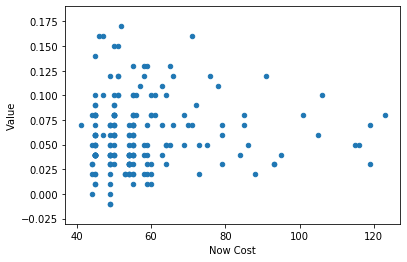

In [13]:
# Scatterplot 
df.plot(x='Now Cost', y='Value',kind='scatter')